# **Define of Model**

In [1]:
import torch
import torch.nn as nn
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sympy import symbols, Basic

def print_symbolic_expression(func):
    def wrapper(*args):
        # Perform original calculation
        result = func(*args)
        
        # Check if the last argument (x) is symbolic and print the symbolic expression
        if isinstance(args[-1], Basic):  # Check if x is a SymPy symbolic type
            symbolic_result = func(*args)
            print("Symbolic Expression with x as symbolic: \n", symbolic_result)
        
        return result  # Return the original numerical result
    return wrapper

Unse the Property of Tunnel Diode

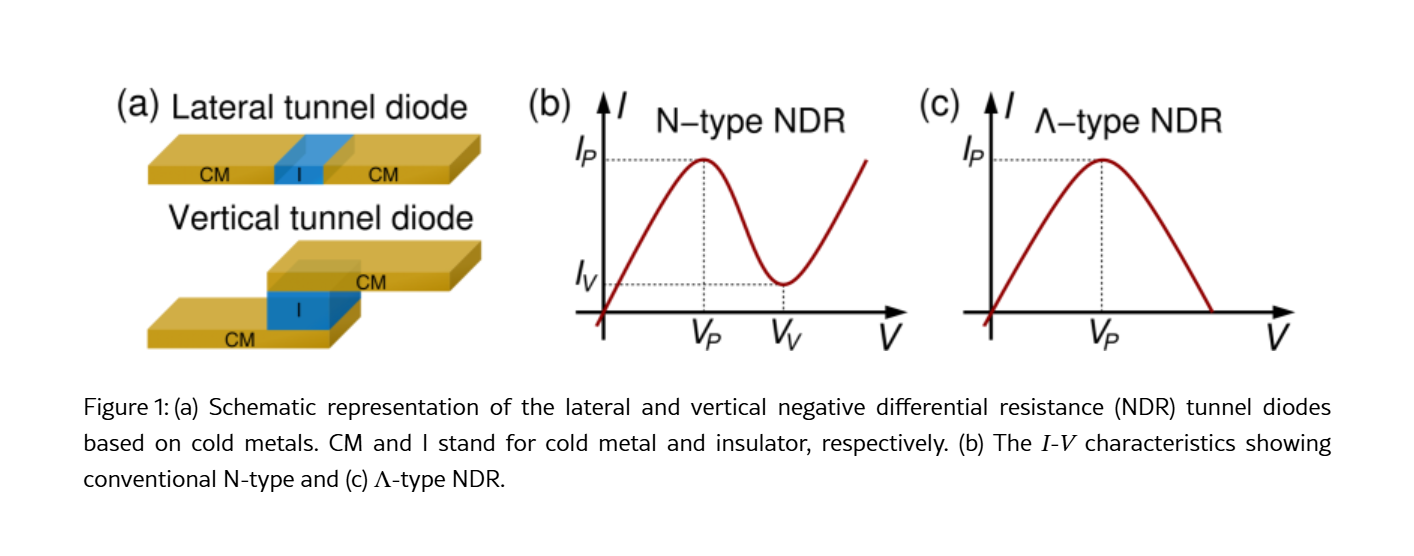 <!-- .element: width="300" -->

when implementing, we have to use real Tunnel Diodes as different basis

So we choose different types of diode and combine them together



[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175
 1.2   1.225]
[0.000e+00 1.150e+00 2.320e+00 3.350e+00 4.680e+00 4.980e+00 6.220e+00
 6.880e+00 7.560e+00 8.340e+00 9.250e+00 9.560e+00 1.001e+01 1.034e+01
 1.138e+01 1.228e+01 1.326e+01 1.387e+01 1.469e+01 1.582e+01 1.685e+01
 1.823e+01 1.945e+01 2.103e+01 2.223e+01 2.365e+01 2.426e+01 2.533e+01
 2.621e+01 2.641e+01 2.633e+01 2.574e+01 2.512e+01 2.479e+01 2.488e+01
 2.403e+01 2.123e+01 1.887e+01 1.892e+01 1.923e+01 1.896e+01 1.873e+01
 1.516e+01 1.245e+01 9.560e+00 6.560e+00 2.580e+00 1.880e+00 2.300e-01
 2.000e-02]


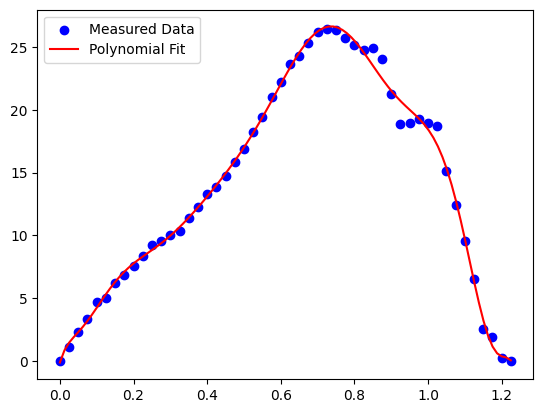

            12            11             10             9             8
-2.878e+05 x  + 2.04e+06 x  - 6.296e+06 x  + 1.111e+07 x - 1.237e+07 x
              7             6             5             4             3
 + 9.075e+06 x - 4.431e+06 x + 1.424e+06 x - 2.897e+05 x + 3.479e+04 x
         2
 - 2213 x + 100.6 x - 0.1206


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score

# 读取 CSV 文件 (假设第一列是电压 V，第二列是电流 I)
data = pd.read_excel("I-Vcurve from paper.xlsx")
#data = data.dropna(subset=['voltage-zig', 'current-zig'])
#print(data)

# 获取电压 (V) 和电流 (I) 数据
V_arm = data["voltage-arm"].values  # 电压
I_arm = data["current-arm"].values  # 电流

V_zig = data["voltage-zig"].values  # 电压
I_zig = data["current-zig"].values  # 电流
mask = ~np.isnan(V_zig) & ~np.isnan(I_zig)
V_zig = V_zig[mask]
I_zig = I_zig[mask]

print(V_zig)
print(I_zig)

coeffs_arm = np.polyfit(V_arm, I_arm, deg=12)  # 十阶多项式拟合
poly_func_arm = np.poly1d(coeffs_arm)

coeffs_zig = np.polyfit(V_zig, I_zig, deg=12)  # 十阶多项式拟合
poly_func_zig = np.poly1d(coeffs_zig)  # 生成多项式函数

# 画出拟合曲线
V_fit = np.linspace(min(V_zig), max(V_zig), 100)
I_fit = poly_func_zig(V_fit)

plt.scatter(V_zig, I_zig, label="Measured Data", color='blue')
plt.plot(V_fit, I_fit, label="Polynomial Fit", color='red')
plt.legend()
plt.show()

print(poly_func_zig)


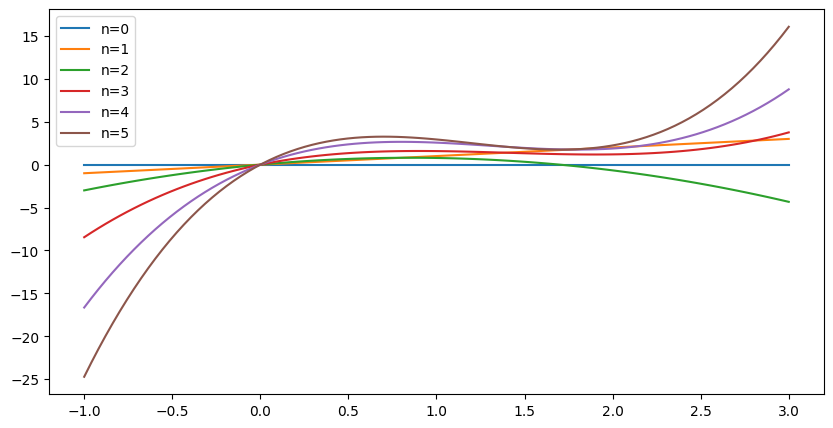

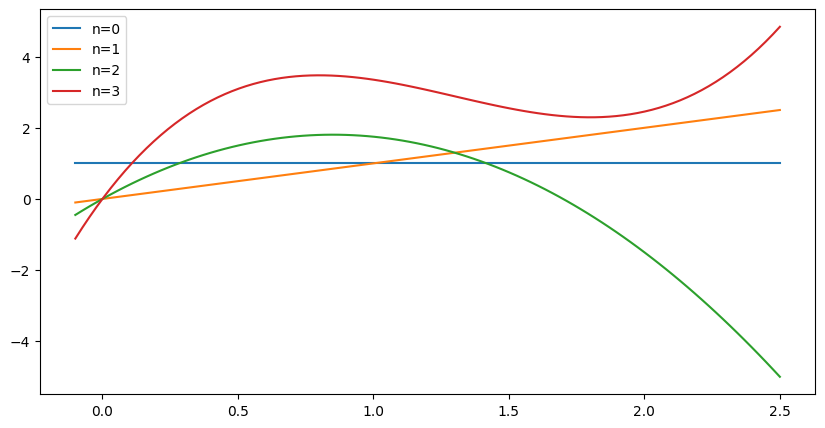

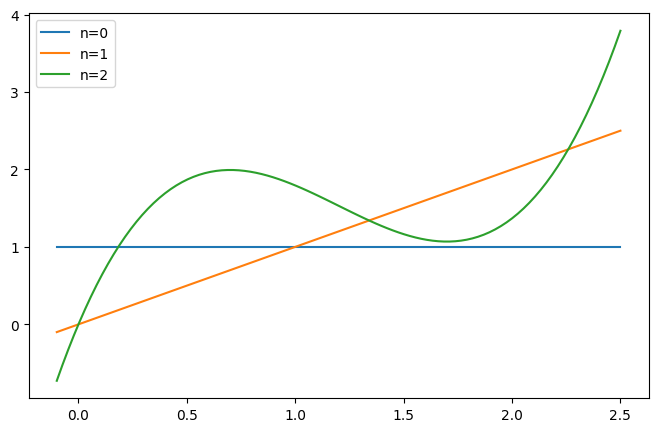

Symbolic Expression with x as symbolic: 
 -1.11111111111111*x**2 + 1.88888888888889*x
poly2 = -1.11111111111111*x**2 + 1.88888888888889*x
Symbolic Expression with x as symbolic: 
 2.36111111111111*x**3 - 9.20833333333333*x**2 + 10.2*x
poly3 = 2.36111111111111*x**3 - 9.20833333333333*x**2 + 10.2*x


In [3]:
@print_symbolic_expression
def Tunnel_diode_3rd(Ip, Vp, Iv, Vv, x):
    # Step 1: Calculate a3
    numerator_a3 = 2 * (Ip - Iv)
    denominator_a3 = (Vp**3 - Vv**3) - (Vp**2 - Vv**2) * (Vp + Vv)
    a3 = numerator_a3 / denominator_a3
    # Step 2: Calculate a2
    a2 = (-3 * a3 * (Vv**2 - Vp**2)) / (2 * (Vv - Vp))
    # Step 3: Calculate a1
    a1 = 3 * a3 * ((Vv**2 - Vp**2) * Vv) / (Vv - Vp) - 3 * a3 * Vv**2

    # Calculate polynomial
    return a3 * x**3 + a2 * x**2 + a1 * x

@print_symbolic_expression
def Tunnel_diode_2nd(Ip, Vp, Vv, x):
    # Calculate a2
    a2 = Ip / (Vp**2 - Vv * Vp)
    # Calculate a1
    a1 = -a2 * Vv
    # Calculate polynomial
    return a2 * x**2 + a1 * x

def TDiode_basis(n, x):
    # use true diode parameters
    if n == 0:
        return x * 0
    elif n == 1:
        return x
    elif n == 2:
        return Tunnel_diode_2nd(0.8, 0.9, 1.7, x)
    elif n == 3:
        return Tunnel_diode_3rd(1.0, 0.9, 0.3, 1.9, x)
    elif n == 4:
        return Tunnel_diode_3rd(1.5, 0.8, 0.2, 1.8, x)
    elif n == 5:
        return Tunnel_diode_3rd(1.9, 0.7, 0.1, 1.7, x)

def TDiode_basis_simple(n, x):
    # use true diode parameters
    if n == 0:
        return x/x
    elif n == 1:
        return x
    elif n == 2:
        return Tunnel_diode_2nd(1.8, 0.9, 1.7, x)
    elif n == 3:
        return Tunnel_diode_3rd(1.9, 0.8, 0.2, 1.8, x)
    elif n == 4:
        return Tunnel_diode_3rd(1.2, 0.7, 0.1, 1.7, x)

def TDiode_basis_GaAs(n, x):
    # use true diode parameters
    if n == 0:
        return x/x
    elif n == 1:
        return x
    elif n == 2:
        return Tunnel_diode_3rd(1.2, 0.7, 0.1, 1.7, x)

# draw the basis functions and compare in one figure with different colors
# and plot the name of the basis functions
x = np.linspace(-1, 3, 100)
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.plot(x, TDiode_basis(i, x), label='n={}'.format(i))
plt.legend()
plt.show()

# draw the simple basis functions and compare in another one figure with different colors
# and plot the name of the simple basis functions
x = np.linspace(-0.1, 2.5, 100)
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot(x, TDiode_basis_simple(i, x), label='n={}'.format(i))
plt.legend()
plt.show()

# draw the simple basis functions and compare in another one figure with different colors
# and plot the name of the simple basis functions
x = np.linspace(-0.1, 2.5, 100)
plt.figure(figsize=(8, 5))
for i in range(3):
    plt.plot(x, TDiode_basis_GaAs(i, x), label='n={}'.format(i))
plt.legend()
plt.show()


x = symbols('x')
print(f"poly2 = {Tunnel_diode_2nd(0.8, 0.9, 1.7, x)}")
print(f"poly3 = {Tunnel_diode_3rd(1.9, 0.8, 0.2, 1.8, x)}")


In [10]:
# %pip install torchsummary

class TDiode_KANLayer(nn.Module):
    def __init__(self, input_dim, output_dim, degree):
        super(TDiode_KANLayer, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.degree = degree

        self.gottlieb_coeffs = nn.Parameter(torch.empty(input_dim, output_dim, degree))
        nn.init.normal_(self.gottlieb_coeffs, mean=0.0, std=1 / (input_dim * (degree)))

    def forward(self, x):
        # Rescale the input into the range of [0, 2.5]
        # x = 2.5 * (x - x.min()) / (x.max() - x.min())
        x = 2.5 * torch.sigmoid(x)

        # Compute the Gottlieb basis functions
        TD_basis = []

        #for n in range(self.degree):
        #    TD_basis.append(TDiode_basis_GaAs(n, x))
        TD_basis.append(poly_func_arm)
        TD_basis.append(poly_func_zig)
        TD_basis = torch.stack(TD_basis, dim=-1)  # shape = (batch_size, input_dim, degree )
        #print(TD_basis,"bb")

        # Compute the Tunnel_Diode interpolation
        y = torch.einsum("bid,iod->bo", TD_basis, self.gottlieb_coeffs)  # shape = (batch_size, output_dim)
        y = y.view(-1, self.output_dim)

        return y

# define a global constant for the input dimension
PIC_DIM = 7
INPUT_DIM = PIC_DIM * PIC_DIM
HIDDEN_DIM = 10
Tunnel_order = 3

class MNIST_TD_KAN(nn.Module):
    def __init__(self):
        super(MNIST_TD_KAN, self).__init__()
        self.trigkan1 = TDiode_KANLayer(INPUT_DIM, HIDDEN_DIM, Tunnel_order)
        self.bn1 = nn.LayerNorm(HIDDEN_DIM)
        self.trigkan2 = TDiode_KANLayer(HIDDEN_DIM, 10, Tunnel_order)
        # self.bn2 = nn.LayerNorm(16)
        # self.trigkan3 = TDiode_KANLayer(16, 10, 2)

    def forward(self, x):
        x = x.view(-1, PIC_DIM*PIC_DIM)
        #x=x.sinh()
        x = self.trigkan1(x)
        x = self.bn1(x)
        x = self.trigkan2(x)
        # x = self.bn2(x)
        # x = self.trigkan3(x)
        return x

# plot the detailed structure of the model
model = MNIST_TD_KAN()
print(model)


MNIST_TD_KAN(
  (trigkan1): TDiode_KANLayer()
  (bn1): LayerNorm((10,), eps=1e-05, elementwise_affine=True)
  (trigkan2): TDiode_KANLayer()
)


Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(7, 7), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Lambda()
           )


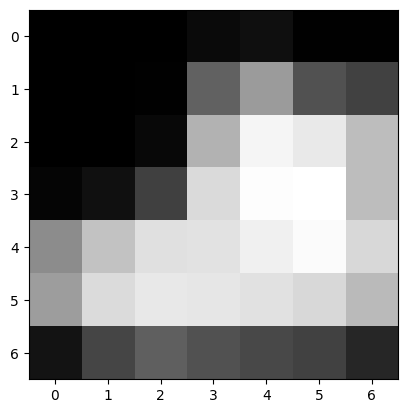

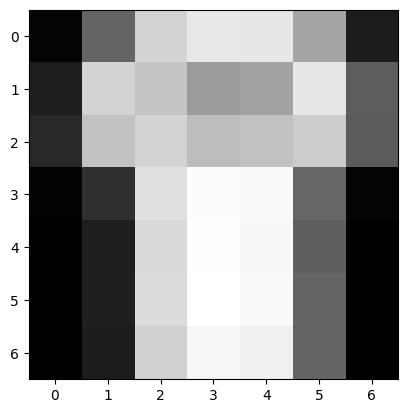

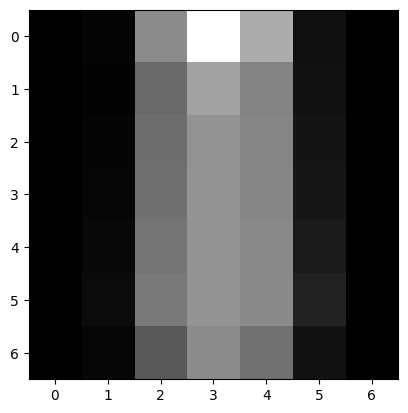

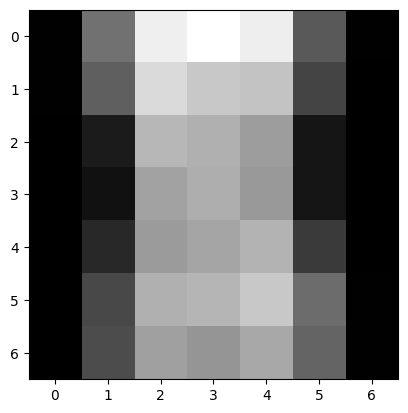

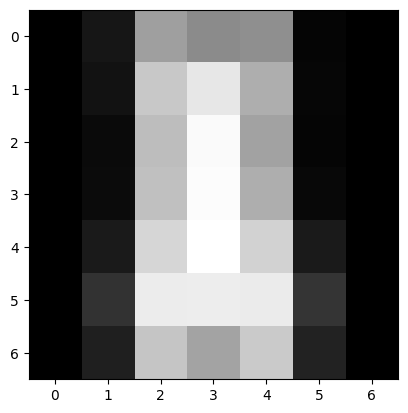

cuda


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np

transform = transforms.Compose([
    transforms.Resize((PIC_DIM, PIC_DIM)),
    transforms.ToTensor(), 
    # Normalized the pixel values to be in the range [0, 2.5]
    transforms.Lambda(lambda x: x * 2.5),
    # Normalize the pixel values to have a mean of 0.1307 and a std of 0.308
    # transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

# print the structure of used dataset
print(train_dataset)

# print some sample picutres of the resized dataset
for i in range(5):
    plt.figure()
    plt.imshow(train_dataset[i][0].squeeze().numpy(), cmap='gray')
    plt.show()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# plot which device is used
print(device)
num_classes = 10

criterion = nn.CrossEntropyLoss()

def train(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    correct = 0
    
    for idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        if isinstance(optimizer, optim.LBFGS):
            def closure():
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                return loss
            loss = optimizer.step(closure)
        else:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            loss = loss.item()
            
        total_loss += loss
        
    return total_loss / len(train_loader)

def validate(model, test_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    return total_loss / len(test_loader), correct / len(test_loader.dataset)

In [12]:
Model_Names=['Tunnel_diode'] # Add names of other models
model0 = MNIST_TD_KAN().to(device)
models=[model0] # Add more models
total_params = sum(p.numel() for p in model0.parameters() if p.requires_grad)
print(f"Total trainable parameters of {Model_Names[0]}: {total_params}")


Total trainable parameters of Tunnel_diode: 1790


# **Training of Model**

In [13]:
import time

epochs = 20

def train_and_validate(models, model_names, train_loader, test_loader, criterion, optimizers, device, epochs):
    train_losses = [[] for _ in range(len(models))]
    test_losses = [[] for _ in range(len(models))]
    best_weights = [None] * len(models)
    best_test_losses = [float('inf')] * len(models)
    model_times = [0.0] * len(models)  # Initialize a list to store processing time for each model

    for epoch in range(epochs):
        for i, (model, optimizer) in enumerate(zip(models, optimizers)):
            start_time = time.time()  # Record the start time

            train_loss = train(model, train_loader, criterion, optimizer, device)
            test_loss, test_accuracy = validate(model, test_loader, criterion, device)

            end_time = time.time()  # Record the end time
            model_times[i] += end_time - start_time  # Accumulate the processing time for the current model

            train_losses[i].append(train_loss)
            test_losses[i].append(test_loss)

            if test_loss < best_test_losses[i]:
                best_test_losses[i] = test_loss
                best_weights[i] = model.state_dict()

            print(f'{model_names[i]}, Epoch {epoch+1}, Train Loss: {train_loss:.4f}, '
                  f'Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.2f}')

    return train_losses, test_losses, best_weights, model_times


optimizers = [optim.Adam(model.parameters(), lr=0.0002) for model in models]

train_losses, test_losses, best_weights, model_times = train_and_validate(models, Model_Names, train_loader, test_loader, criterion, optimizers, device, epochs)

plt.figure(figsize=(10, 5))
for i in range(len(models)):
    plt.plot(range(1, epochs + 1), test_losses[i], label=f'{Model_Names[i]} Test Loss')
plt.title('Test Loss Convergence')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Save the best weights for each model
for i, model in enumerate(models):
    model.load_state_dict(best_weights[i])
    torch.save(model.state_dict(), f'{Model_Names[i]}_best_weights.pth')

# Print the processing time for each model
for i, model_name in enumerate(Model_Names):
    print(f"{model_name} processing time: {model_times[i]:.2f} seconds")

TypeError: expected Tensor as element 0 in argument 0, but got poly1d

# **Model Test**

In [9]:
def predict(model, test_loader, device):
    model.eval()
    predictions = []
    test_labels=[]

    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(device)
            output = model(data)
            pred = output.argmax(dim=1)
            test_labels.extend(target.cpu().numpy())
            predictions.extend(pred.cpu().numpy())
    return predictions,test_labels

from sklearn.metrics import f1_score, cohen_kappa_score, accuracy_score
metrics = {
    'Accuracy': [],
    'Kappa': [],
    'F1 Score': []
}

for i, model in enumerate(models):
    model.load_state_dict(best_weights[i])
    model.eval()

    test_preds,test_labels = predict(model, test_loader, device)
    f1 = f1_score(test_labels, test_preds, average='micro')
    kappa = cohen_kappa_score(test_labels, test_preds)
    overall_acc = accuracy_score(test_labels, test_preds)
    metrics['Accuracy'].append(overall_acc)
    metrics['Kappa'].append(kappa)
    metrics['F1 Score'].append(f1)
    
    print(f"Model {Model_Names[i]} - "
          f"Overall Accuracy: {overall_acc:.4f}, "
          f"Kappa: {kappa:.4f}, "
          f"F1 Score: {f1:.4f}")

tensor([[[1.0000, 1.2500, 1.4617],
         [1.0000, 1.2500, 1.4617],
         [1.0000, 1.2500, 1.4617],
         ...,
         [1.0000, 1.2500, 1.4617],
         [1.0000, 1.2500, 1.4617],
         [1.0000, 1.2500, 1.4617]],

        [[1.0000, 1.2623, 1.4449],
         [1.0000, 1.7112, 1.0689],
         [1.0000, 2.1375, 1.7543],
         ...,
         [1.0000, 1.6737, 1.0705],
         [1.0000, 1.9411, 1.2557],
         [1.0000, 1.5905, 1.0994]],

        [[1.0000, 1.2500, 1.4617],
         [1.0000, 1.2500, 1.4617],
         [1.0000, 1.8608, 1.1480],
         ...,
         [1.0000, 1.9945, 1.3563],
         [1.0000, 1.3478, 1.3317],
         [1.0000, 1.2500, 1.4617]],

        ...,

        [[1.0000, 1.2623, 1.4449],
         [1.0000, 1.4683, 1.1944],
         [1.0000, 1.6298, 1.0816],
         ...,
         [1.0000, 1.5504, 1.1245],
         [1.0000, 1.4920, 1.1719],
         [1.0000, 1.4564, 1.2064]],

        [[1.0000, 1.2500, 1.4617],
         [1.0000, 1.4205, 1.2448],
         [1.

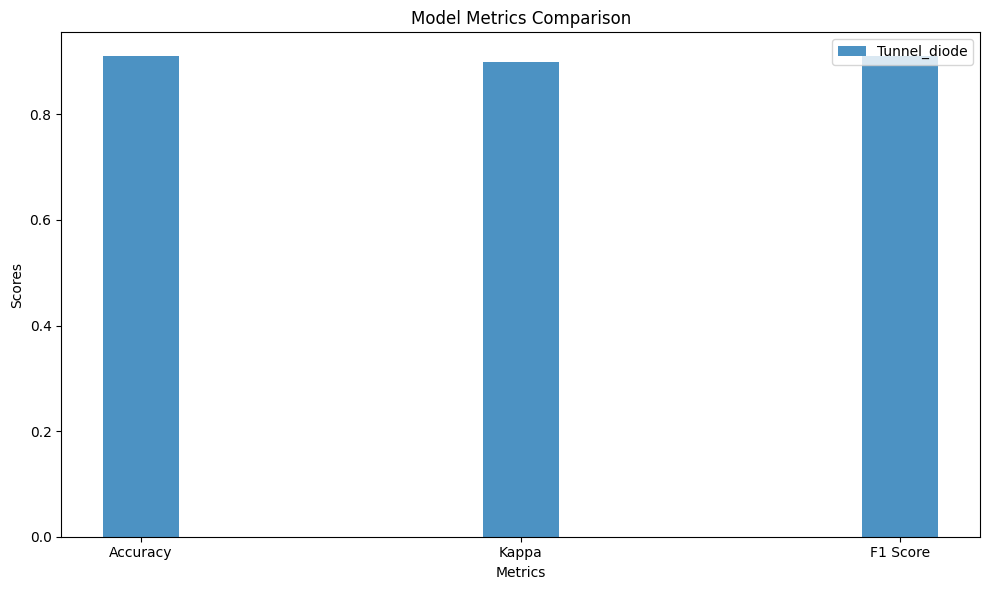

In [159]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
opacity = 0.8
index = np.arange(len(metrics.keys()))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Custom colors for each model

for i, model_name in enumerate(Model_Names):
    model_metrics = [metrics['Accuracy'][i], metrics['Kappa'][i], metrics['F1 Score'][i]]
    ax.bar(index + i * bar_width, model_metrics, bar_width,
           alpha=opacity, color=colors[i], label=model_name)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Metrics Comparison')
ax.set_xticks(index + bar_width * (len(Model_Names) - 1) / 2)
ax.set_xticklabels(metrics.keys())
ax.legend()

plt.tight_layout()
plt.show()